C:\Users\phari\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\phari\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\phari\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\phari\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


ความเร็วของการหมุนมอเตอร์ที่เหมาะสมต่อการซักผ้า มีค่าเท่ากับ : 7.611111111111112


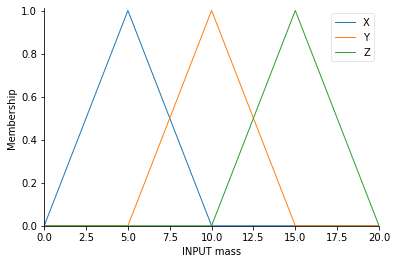

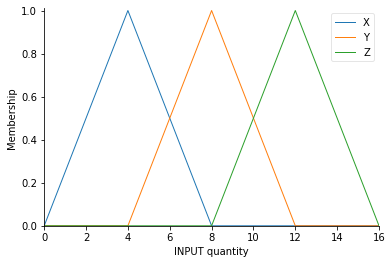

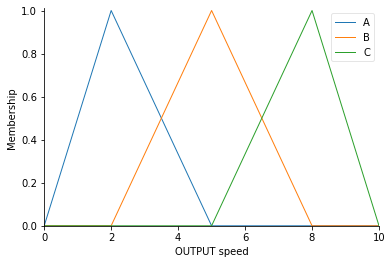

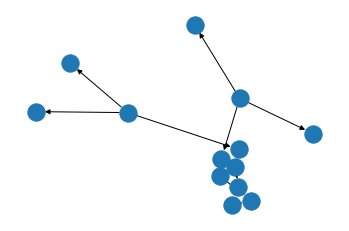

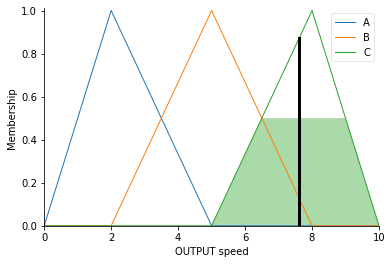

In [19]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

mass = ctrl.Antecedent(np.arange(0, 21, 1), 'INPUT mass')
quantity = ctrl.Antecedent(np.arange(0, 17, 1), 'INPUT quantity')
speed = ctrl.Consequent(np.arange(0, 11, 1), 'OUTPUT speed')

mass['X'] = fuzz.trimf(mass.universe, [0, 5, 10])
mass['Y'] = fuzz.trimf(mass.universe, [5, 10, 15])
mass['Z'] = fuzz.trimf(mass.universe, [10, 15, 20])

quantity['X'] = fuzz.trimf(quantity.universe, [0, 4, 8])
quantity['Y'] = fuzz.trimf(quantity.universe, [4, 8, 12])
quantity['Z'] = fuzz.trimf(quantity.universe, [8, 12, 16])

speed['A'] = fuzz.trimf(speed.universe, [0, 2, 5])
speed['B'] = fuzz.trimf(speed.universe, [2, 5, 8])
speed['C'] = fuzz.trimf(speed.universe, [5, 8, 10])

mass.view()
quantity.view()
speed.view()


rule1 = ctrl.Rule(mass['X'] & quantity['X'], speed['A'])
rule2 = ctrl.Rule(mass['X'] & quantity['Y'], speed['B'])
rule3 = ctrl.Rule(mass['X'] & quantity['Z'], speed['B'])
rule4 = ctrl.Rule(mass['Y'] & quantity['X'], speed['B'])
rule5 = ctrl.Rule(mass['Y'] & quantity['Y'], speed['C'])
rule6 = ctrl.Rule(mass['Y'] & quantity['Z'], speed['C'])
rule7 = ctrl.Rule(mass['Z'] & quantity['X'], speed['B'])
rule8 = ctrl.Rule(mass['Z'] & quantity['Y'], speed['C'])
rule9 = ctrl.Rule(mass['Z'] & quantity['Z'], speed['C'])

rule1.view()
speedping_ctrl = ctrl.ControlSystem(
    [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
speedping = ctrl.ControlSystemSimulation(speedping_ctrl)
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
speedping.input['INPUT mass'] = 15
speedping.input['INPUT quantity'] = 10
speedping.compute()
speed.view(sim=speedping)
print("ความเร็วของการหมุนมอเตอร์ที่เหมาะสมต่อการซักผ้า มีค่าเท่ากับ :",speedping.output['OUTPUT speed'])